In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle
from IPython.display import IFrame
%matplotlib inline

This example uses matplotlib 2.0

In [3]:
#%matplotlib widget
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib version is 3.1.0 

Matplotlibrc file is /Users/markdean/Documents/programs/matplotlib_examples/matplotlibrc



and the matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
please suggest improvements

## A few notes

* All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

* Using a uniform style is very important for an attractive manuscript. Try to avoid ad-hoc changes to the settings. 

* If you feel that there is a desirable change, consider applying it to the whole manuscript, preferably by setting some edits to the rc file right at the start of the script/notebook. e.g. mpl.rc('font', size=10). 

## Create figure

* The width of a figure should always be set to the real physical column width. e.g. 3+3/8 inches for a PRL column. This will mean that fonts appear on the page in the correct size.

* Gridspec and subplots_adjust are useful to set the precise location of panels.

* Including 2-4 minor ticks per major tick is usually good.

* Putting the colorbar on separate axes facilities better control over its location. 

* Saving in pdf creates vector graphics and fast performance within pdflatex.

In [4]:
disp214 = np.load('214_dispersion.npz')
disp327 = disp214

In [5]:
def set_minors(ax):
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
def add_label(ax, label, pos='out'):
    if pos == 'out':
        ax.text(-0.05, 1.15, label, transform=ax.transAxes, va='top', ha='right')
    else:
        ax.text(0.08, 0.85, label, transform=ax.transAxes, va='top', ha='left')

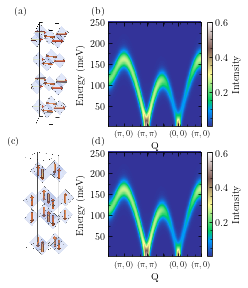

In [7]:
fig = plt.figure(figsize=(3+3/8, 3.7))
gs = GridSpec(2, 2, width_ratios=[0.7, 1])

im = mpl.image.imread('Sr2IrO4_ForMagFigure.png')
ax = plt.subplot(gs[0, 0])
ax.imshow(im)
ax.axis('off')
add_label(ax, '(a)')

im = mpl.image.imread('Sr3Ir2O7_ForMagFigure_Cry.png')
ax = plt.subplot(gs[1, 0])
ax.imshow(im)
ax.axis('off')
add_label(ax, '(c)')

ax = plt.subplot(gs[0, 1])
art = ax.pcolorfast(disp214['x_axis'], disp214['omega_eval'], disp214['I_smooth'], cmap='terrain',
                    vmax=.6)
cb = plt.colorbar(art, ax=ax)
cb.set_label('Intensity')
ax.set_xlabel('Q')
ax.set_ylabel('Energy (meV)')
_ = ax.set_xticks(disp214['ticks'])
_ = ax.set_xticklabels(disp214['label_list'], fontsize=8) # try not to change fontsizes, but making an exception seems unavoidable here
set_minors(ax)
add_label(ax, '(b)')

ax = plt.subplot(gs[1, 1])
art = ax.pcolorfast(disp327['x_axis'], disp327['omega_eval'], disp327['I_smooth'], cmap='terrain',
                vmax=.6)
cb = plt.colorbar(art, ax=ax)
cb.set_label('Intensity')
ax.set_xlabel('Q')
ax.set_ylabel('Energy (meV)')
_ = ax.set_xticks(disp327['ticks'])
_ = ax.set_xticklabels(disp327['label_list'], fontsize=8) # try not to change fontsizes, but making an exception seems unavoidable here
set_minors(ax)
add_label(ax, '(d)')

fig.subplots_adjust(top=0.93, bottom=0.05, left=0.01, wspace=0.2, hspace=0.25)


fig.savefig('ex_14_SWT.pdf', dpi=1200)